# Análisis Exploratorio y Descriptivo de Consumo de Energía en EVs

Este notebook realiza un análisis exploratorio de datos (EDA) para entender las características del dataset, detectar valores atípicos y patrones, y preparar los datos para análisis posteriores.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo y visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Carga de datos
file_path = 'EV_Energy_Consumption_Cleaned - EV_Energy_Consumption_Cleaned.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset cargado correctamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró. Verifica la ruta.")

Dataset cargado correctamente.


## 1. Inspección de Estructura y Calidad de Datos

In [8]:
# Visualización de las primeras filas
print("Primeras 5 filas del dataset:")
display(df.head())

# Información general del dataset
print("\nInformación del Dataset:")
df.info()

# Detección de valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

Primeras 5 filas del dataset:


,Speed_kmh,Acceleration_ms2,Battery_State_%,Battery_Voltage_V,Battery_Temperature_C,Driving_Mode,Road_Type,Traffic_Condition,Slope_%,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
0,111.507366,-2.773816,30.415148,378.091525,25.314786,2,1,1,6.879446,4,0.741770,42.172533,7.829253,31.112020,1822.967368,20.757508,12.054317
1,48.612323,-0.796982,97.385534,392.718377,18.240755,1,2,1,-3.007212,4,-3.495516,57.018427,4.495572,31.504366,2091.831914,0.642918,4.488701
2,108.733320,0.253800,84.912600,398.993495,44.449145,1,1,3,0.029585,1,9.248275,69.028911,5.144489,33.838015,1816.702497,40.842824,11.701377
3,38.579484,-2.111395,28.777904,358.128273,28.980155,1,2,2,8.271943,3,2.868409,86.638349,4.518283,33.256014,1283.102642,5.305229,7.389266
4,57.172438,1.477883,29.740160,310.888162,33.184551,2,1,1,2.776814,2,16.750244,27.189185,4.263406,33.579678,2160.350788,5.825926,6.761205



Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Speed_kmh               5000 non-null   float64
 1   Acceleration_ms2        5000 non-null   float64
 2   Battery_State_%         5000 non-null   float64
 3   Battery_Voltage_V       5000 non-null   float64
 4   Battery_Temperature_C   5000 non-null   float64
 5   Driving_Mode            5000 non-null   int64  
 6   Road_Type               5000 non-null   int64  
 7   Traffic_Condition       5000 non-null   int64  
 8   Slope_%                 5000 non-null   float64
 9   Weather_Condition       5000 non-null   int64  
 10  Temperature_C           5000 non-null   float64
 11  Humidity_%              5000 non-null   float64
 12  Wind_Speed_ms           5000 non-null   float64
 13  Tire_Pressure_psi       5000 non-null   float64
 14  Vehicle_Weight

In [5]:
# Conversión de variables numéricas a categóricas
# Se identifican 'Driving_Mode', 'Road_Type', 'Traffic_Condition', 'Weather_Condition' como cualitativas.
cols_to_categorical = ['Driving_Mode', 'Road_Type', 'Traffic_Condition', 'Weather_Condition']

# Verificar si existen y convertir
for col in cols_to_categorical:
    if col in df.columns:
        df[col] = df[col].astype('object') # o 'category'
        print(f"Variable '{col}' convertida a tipo object (text/categórica).")

print("\nTipos de datos actualizados:")
print(df[cols_to_categorical].dtypes)

Variable 'Driving_Mode' convertida a tipo object (text/categórica).
Variable 'Road_Type' convertida a tipo object (text/categórica).
Variable 'Traffic_Condition' convertida a tipo object (text/categórica).
Variable 'Weather_Condition' convertida a tipo object (text/categórica).

Tipos de datos actualizados:
Driving_Mode         object
Road_Type            object
Traffic_Condition    object
Weather_Condition    object
dtype: object


## 2. Estadísticos Descriptivos Básicos

In [10]:
# Estadísticos para variables numéricas
print("Estadísticos Descriptivos (Numéricos):")
display(df.describe())

# Estadísticos para variables categóricas (si existen)
print("\nEstadísticos Descriptivos (Categóricos):")
try:
    display(df.describe(include='object'))
except ValueError:
    print("No hay columnas categóricas en el dataset.")

Estadísticos Descriptivos (Numéricos):


,Speed_kmh,Acceleration_ms2,Battery_State_%,Battery_Voltage_V,Battery_Temperature_C,Slope_%,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,59.312952,-0.019885,60.214465,351.118306,27.510130,2.504690,17.312654,55.302173,7.505087,31.503390,1854.719760,24.994042,8.437983
std,34.517605,1.724287,23.128262,28.968372,10.015385,4.360854,13.005106,20.161289,4.325455,2.017357,373.685150,14.246454,2.184809
min,0.001396,-2.999683,20.020196,300.004812,10.003858,-4.991079,-4.995288,20.027119,0.000126,28.001891,1200.960317,0.107544,1.881426
25%,29.515400,-1.490240,40.088318,326.613439,18.884742,-1.235653,5.950476,37.970900,3.837738,29.772709,1531.417633,12.736568,6.771081
50%,58.646794,-0.043329,60.490283,351.510915,27.581710,2.452368,17.330798,55.650512,7.495373,31.484048,1865.006523,24.640458,8.455746
75%,89.030001,1.473887,80.409928,375.968140,35.920162,6.366990,28.624021,72.650838,11.291284,33.256528,2181.071491,37.562482,10.031938
max,119.946924,2.998039,99.993986,399.990098,44.985943,9.998358,39.998063,89.988891,14.999095,34.997829,2499.504564,49.993767,14.660528



Estadísticos Descriptivos (Categóricos):


,Driving_Mode,Road_Type,Traffic_Condition,Weather_Condition
count,5000,5000,5000,5000
unique,3,3,3,4
top,2,2,2,2
freq,1719,1732,1702,1279



Distribución de frecuencias para 'Driving_Mode':
Driving_Mode
2    1719
3    1668
1    1613
Name: count, dtype: int64

Distribución de frecuencias para 'Road_Type':
Road_Type
2    1732
1    1636
3    1632
Name: count, dtype: int64

Distribución de frecuencias para 'Traffic_Condition':
Traffic_Condition
2    1702
3    1676
1    1622
Name: count, dtype: int64

Distribución de frecuencias para 'Weather_Condition':
Weather_Condition
2    1279
1    1260
3    1245
4    1216
Name: count, dtype: int64


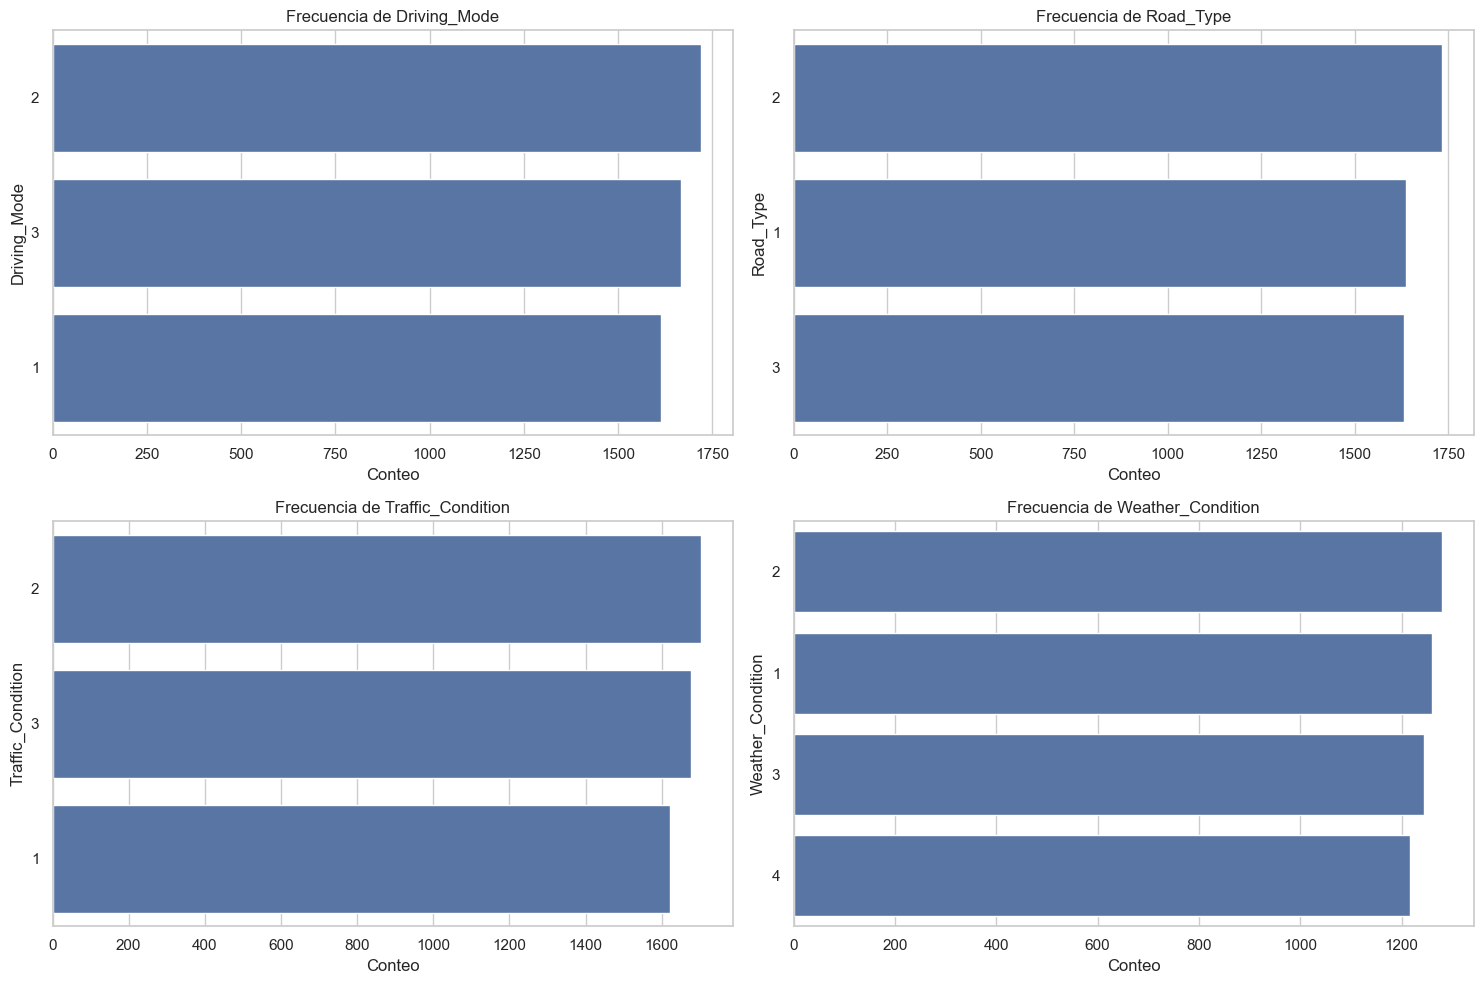

In [11]:
# Lista de variables categóricas de interés
categorical_cols = ['Driving_Mode', 'Road_Type', 'Traffic_Condition', 'Weather_Condition']

# Verificar si existen en el dataset
existing_cat_cols = [col for col in categorical_cols if col in df.columns]

if existing_cat_cols:
    plt.figure(figsize=(15, 5 * ((len(existing_cat_cols) + 1) // 2)))
    for i, col in enumerate(existing_cat_cols):
        # Mostrar conteo de valores
        print(f"\nDistribución de frecuencias para '{col}':")
        print(df[col].value_counts())
        
        # Gráfico de barras
        plt.subplot(((len(existing_cat_cols) + 1) // 2), 2, i + 1)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Frecuencia de {col}')
        plt.xlabel('Conteo')
        plt.tight_layout()
    plt.show()
else:
    print(f"No se encontraron las columnas especificadas: {categorical_cols}")

## 3. Análisis de Distribuciones (Histogramas)

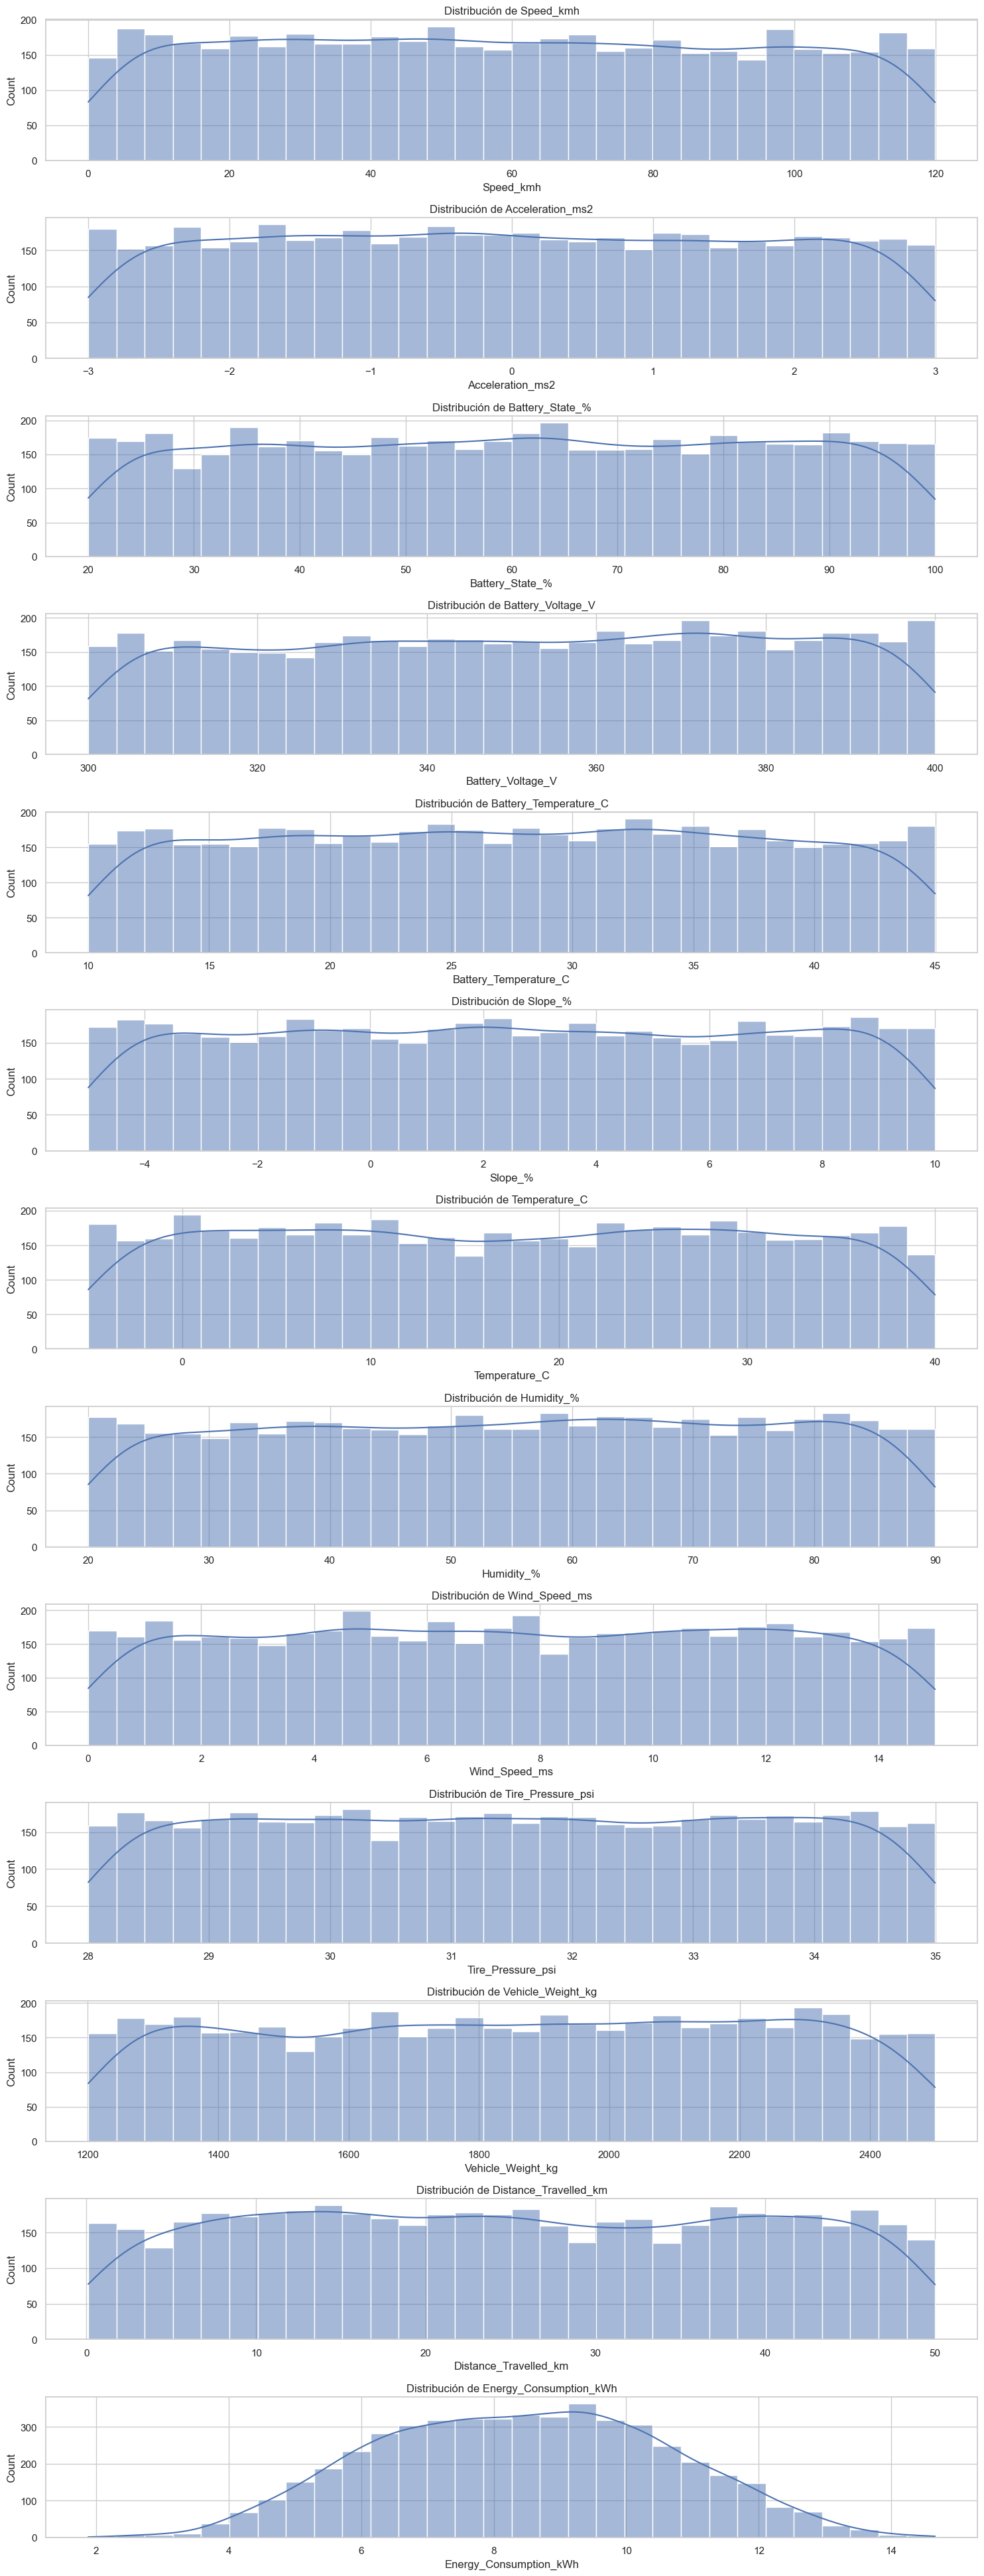

In [6]:
# Seleccionar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Generar histogramas para cada variable numérica
plt.figure(figsize=(15, len(numeric_cols) * 3))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1) # Cambiar a subplots en una columna para visualización clara
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

plt.show()

## 4. Detección de Valores Atípicos (Boxplots)

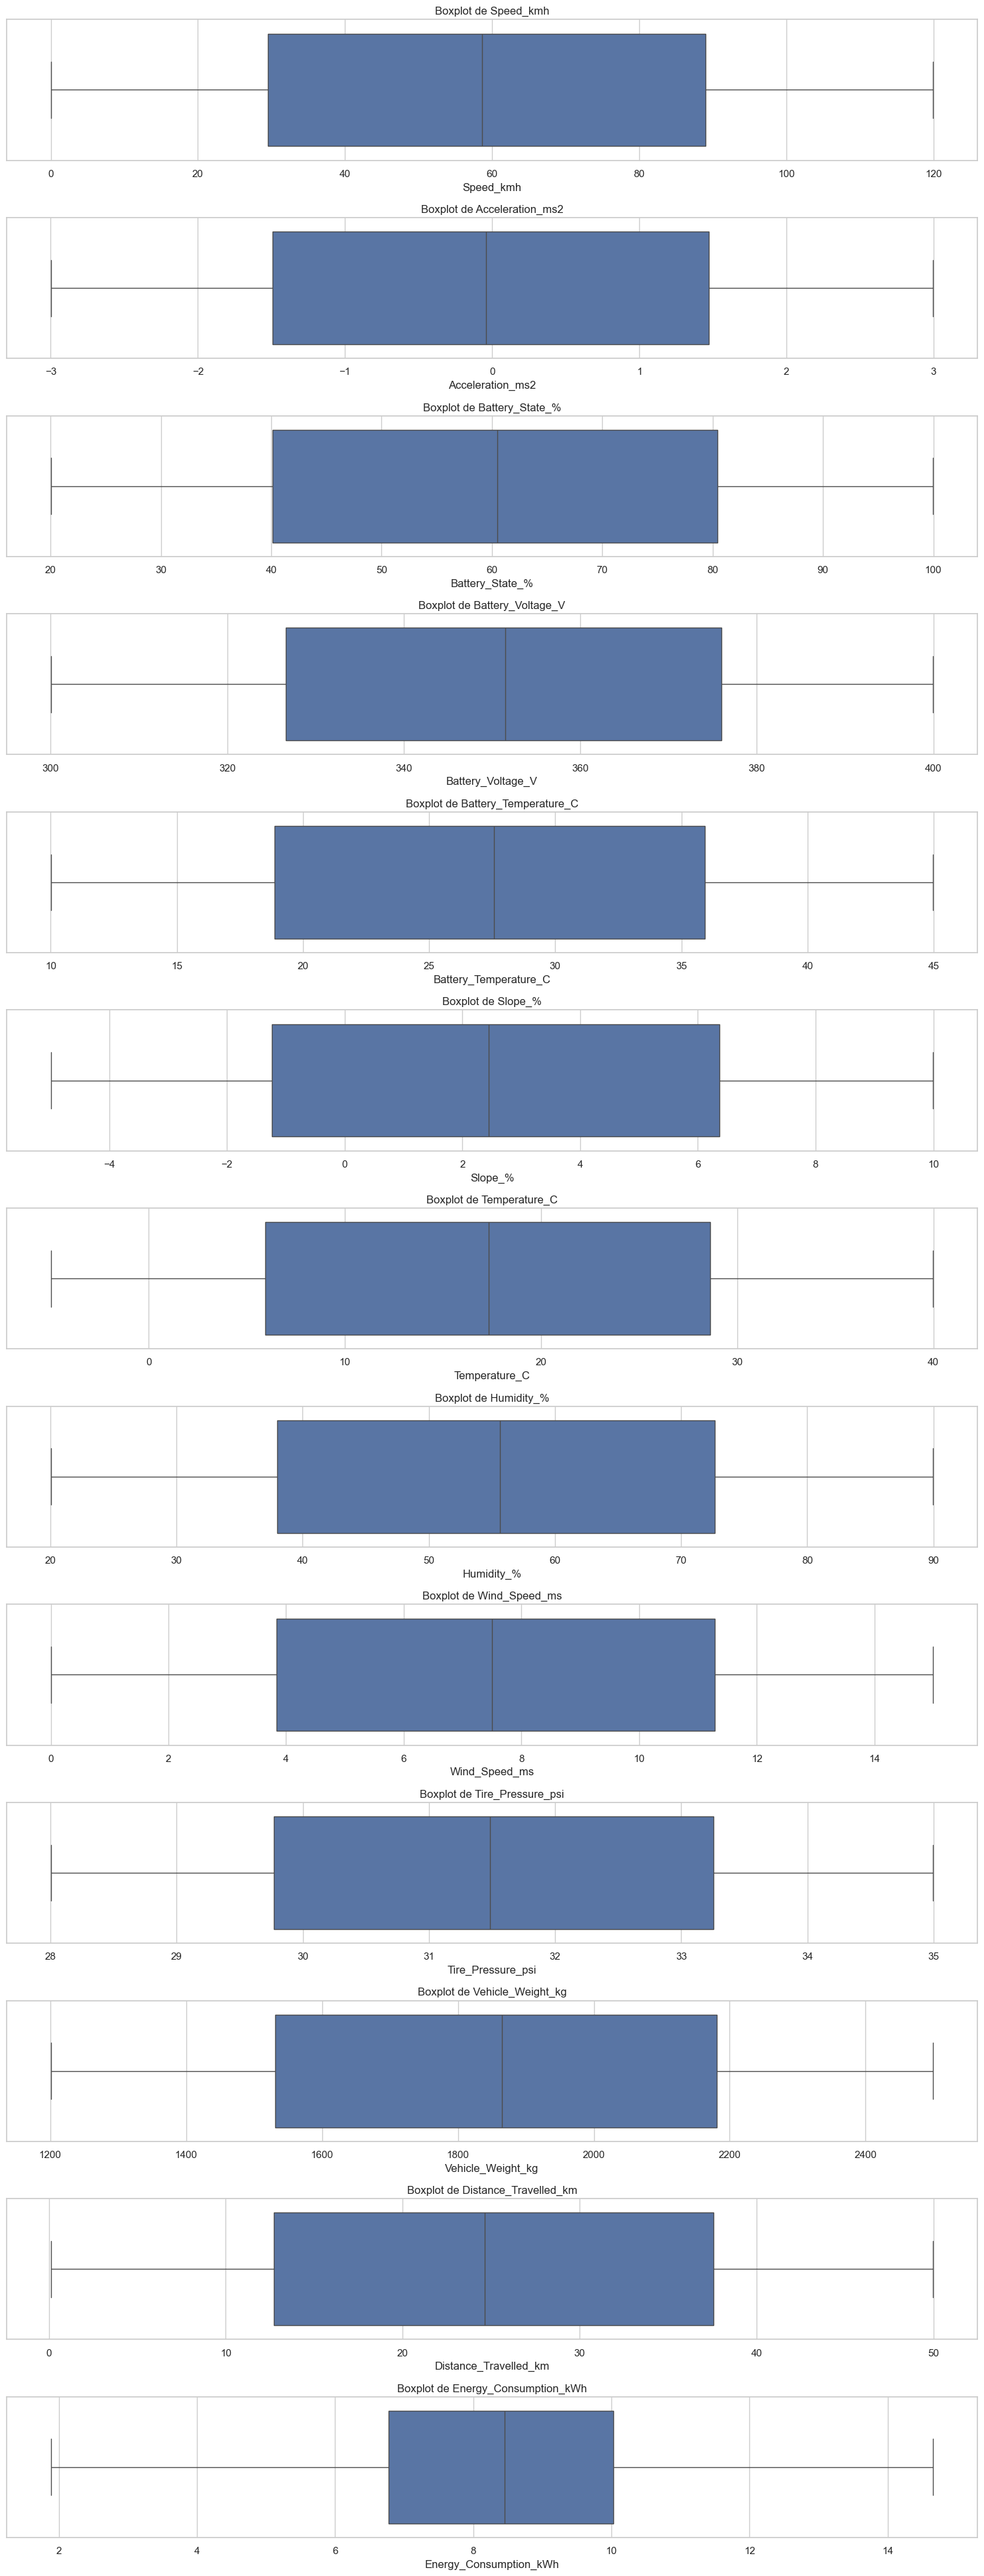

In [ ]:
# Generar boxplots para cada variable numérica
plt.figure(figsize=(15, len(numeric_cols) * 3))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

## 5. Identificación de Transformaciones (Sesgo/Skewness)

In [7]:
# Calcular el sesgo (skewness) de las variables numéricas
skewness = df[numeric_cols].skew()
print("Skewness (Sesgo) de variables numéricas:")
print(skewness.sort_values(ascending=False))

# Identificar variables con sesgo alto (> 1 o < -1) que podrían beneficiarse de transformaciones
high_skew_cols = skewness[abs(skewness) > 1].index
print(f"\nVariables con alto sesgo (posible necesidad de transformación Log/Sqrt): {list(high_skew_cols)}")

if len(high_skew_cols) > 0:
    print("\nEjemplo de transformación Logarítmica para la variable más sesgada:")
    col_to_transform = high_skew_cols[0]
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col_to_transform], kde=True)
    plt.title(f'Original: {col_to_transform}')
    
    # Aplicar log (sumando constante pequeña para evitar log(0))
    # Se usa np.log1p (log(1+x)) que es seguro para valores >= 0
    transformed_data = np.log1p(df[col_to_transform])
    
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, kde=True)
    plt.title(f'Transformada (Log): {col_to_transform}')
    
    plt.show()
else:
    print("\nNo se detectaron variables con sesgo extremo (>1 o <-1).")

Skewness (Sesgo) de variables numéricas:
Speed_kmh                 0.036210
Energy_Consumption_kWh    0.020562
Distance_Travelled_km     0.019751
Acceleration_ms2          0.015909
Temperature_C             0.005821
Slope_%                   0.001845
Battery_Temperature_C    -0.001318
Tire_Pressure_psi        -0.002460
Wind_Speed_ms            -0.004538
Battery_State_%          -0.016443
Humidity_%               -0.033031
Vehicle_Weight_kg        -0.041860
Battery_Voltage_V        -0.051650
dtype: float64

Variables con alto sesgo (posible necesidad de transformación Log/Sqrt): []

No se detectaron variables con sesgo extremo (>1 o <-1).
